# Analysis

(NEW REPLACEMENT)

In this file, I'll gather all the data in its final form and begin analysis.

## Imports

In [1]:
import pandas as pd
import xml.etree.ElementTree as et
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_names = ['caes-gal.xml', 'cic-att.xml', 'cic-off.xml', 'latin-nt.xml', 'pal-agr.xml', 'per-aeth.xml']
file_names = list(map(lambda s: '../annotations/' + s, file_names))

def get_text(sent):
    text = ''
    for tok in sent.iter('token'):
        if tok.get('form') != None and tok.get('presentation-after') != None:
            text += tok.get('form') + tok.get('presentation-after')
    return text

author = {'cae' : 'Caesar', 'cic' : 'Cicero', 'lat' : 'Jerome', 'pal' : 'Palladius', 'per' : 'Egeria'}

sents = []
unique_id = 0
for file in file_names:
    xml = et.parse(file)
    for sent in xml.iter('sentence'):
        sent.set('file', file[len('../annotations/'):])
        sent.set('author', author[file[len('../annotations/'):len('../annotations/')+3]])
        sent.set('era', 'Classical' if sent.get('author') in ['Caesar', 'Cicero'] else 'Late')
        if sent.get('id') == None:
            sent.set('id', 'U' + str(unique_id))
            unique_id += 1
        sents.append(sent)
        

df = pd.DataFrame()
df['Id'] = [sent.get('id') for sent in sents]
df['File'] = [sent.get('file') for sent in sents]
df['Author'] = [sent.get('author') for sent in sents]
df['Era'] = [sent.get('era') for sent in sents]
df['Type'] = [sent.get('indirect-type') for sent in sents]
df['Lemma'] = [sent.get('indirect-lemma') for sent in sents]
df['Tense'] = [sent.get('indirect-tense') for sent in sents]
df['Mood'] = [sent.get('indirect-mood') for sent in sents]
df['Voice'] = [sent.get('indirect-voice') for sent in sents]
df['Text'] = [get_text(sent) for sent in sents]
df

,Id,File,Author,Era,Type,Lemma,Tense,Mood,Voice,Text
0,63444,caes-gal.xml,Caesar,Classical,AcI,sum,present,infinitive,active,"perfacile esse, cum virtute omnibus praestaren..."
1,52564,caes-gal.xml,Caesar,Classical,AcI,habeo,present,infinitive,active,Pro multitudine autem hominum et pro gloria be...
2,52566,caes-gal.xml,Caesar,Classical,AcI,sum,present,infinitive,active,Ad eas res conficiendas biennium sibi satis es...
3,52572,caes-gal.xml,Caesar,Classical,AcI,sum,present,infinitive,active,Perfacile factu esse illis probat conata perfi...
4,52574,caes-gal.xml,Caesar,Classical,AcI,possum,present,infinitive,active,Hac oratione adducti inter se fidem et ius iur...
...,...,...,...,...,...,...,...,...,...,...
2280,58111,per-aeth.xml,Egeria,Late,AcI,doceo,present,infinitive,passive,"Octaua enim septimana quadragesimarum, id est ..."
2281,58117,per-aeth.xml,Egeria,Late,AcI,fio,present,infinitive,passive,"Et ne extimetis aliquid sine ratione fieri, cu..."
2282,58123,per-aeth.xml,Egeria,Late,AcI,expono,present,infinitive,passive,"Vere enim ita misteria omnia absoluet, ut null..."
2283,58126,per-aeth.xml,Egeria,Late,AcI,lego,present,infinitive,passive,"Lectiones etiam, quecumque in ecclesia leguntu..."


## Plots

Let's first take a look at the overall frequency of each type.

<AxesSubplot:ylabel='Type'>

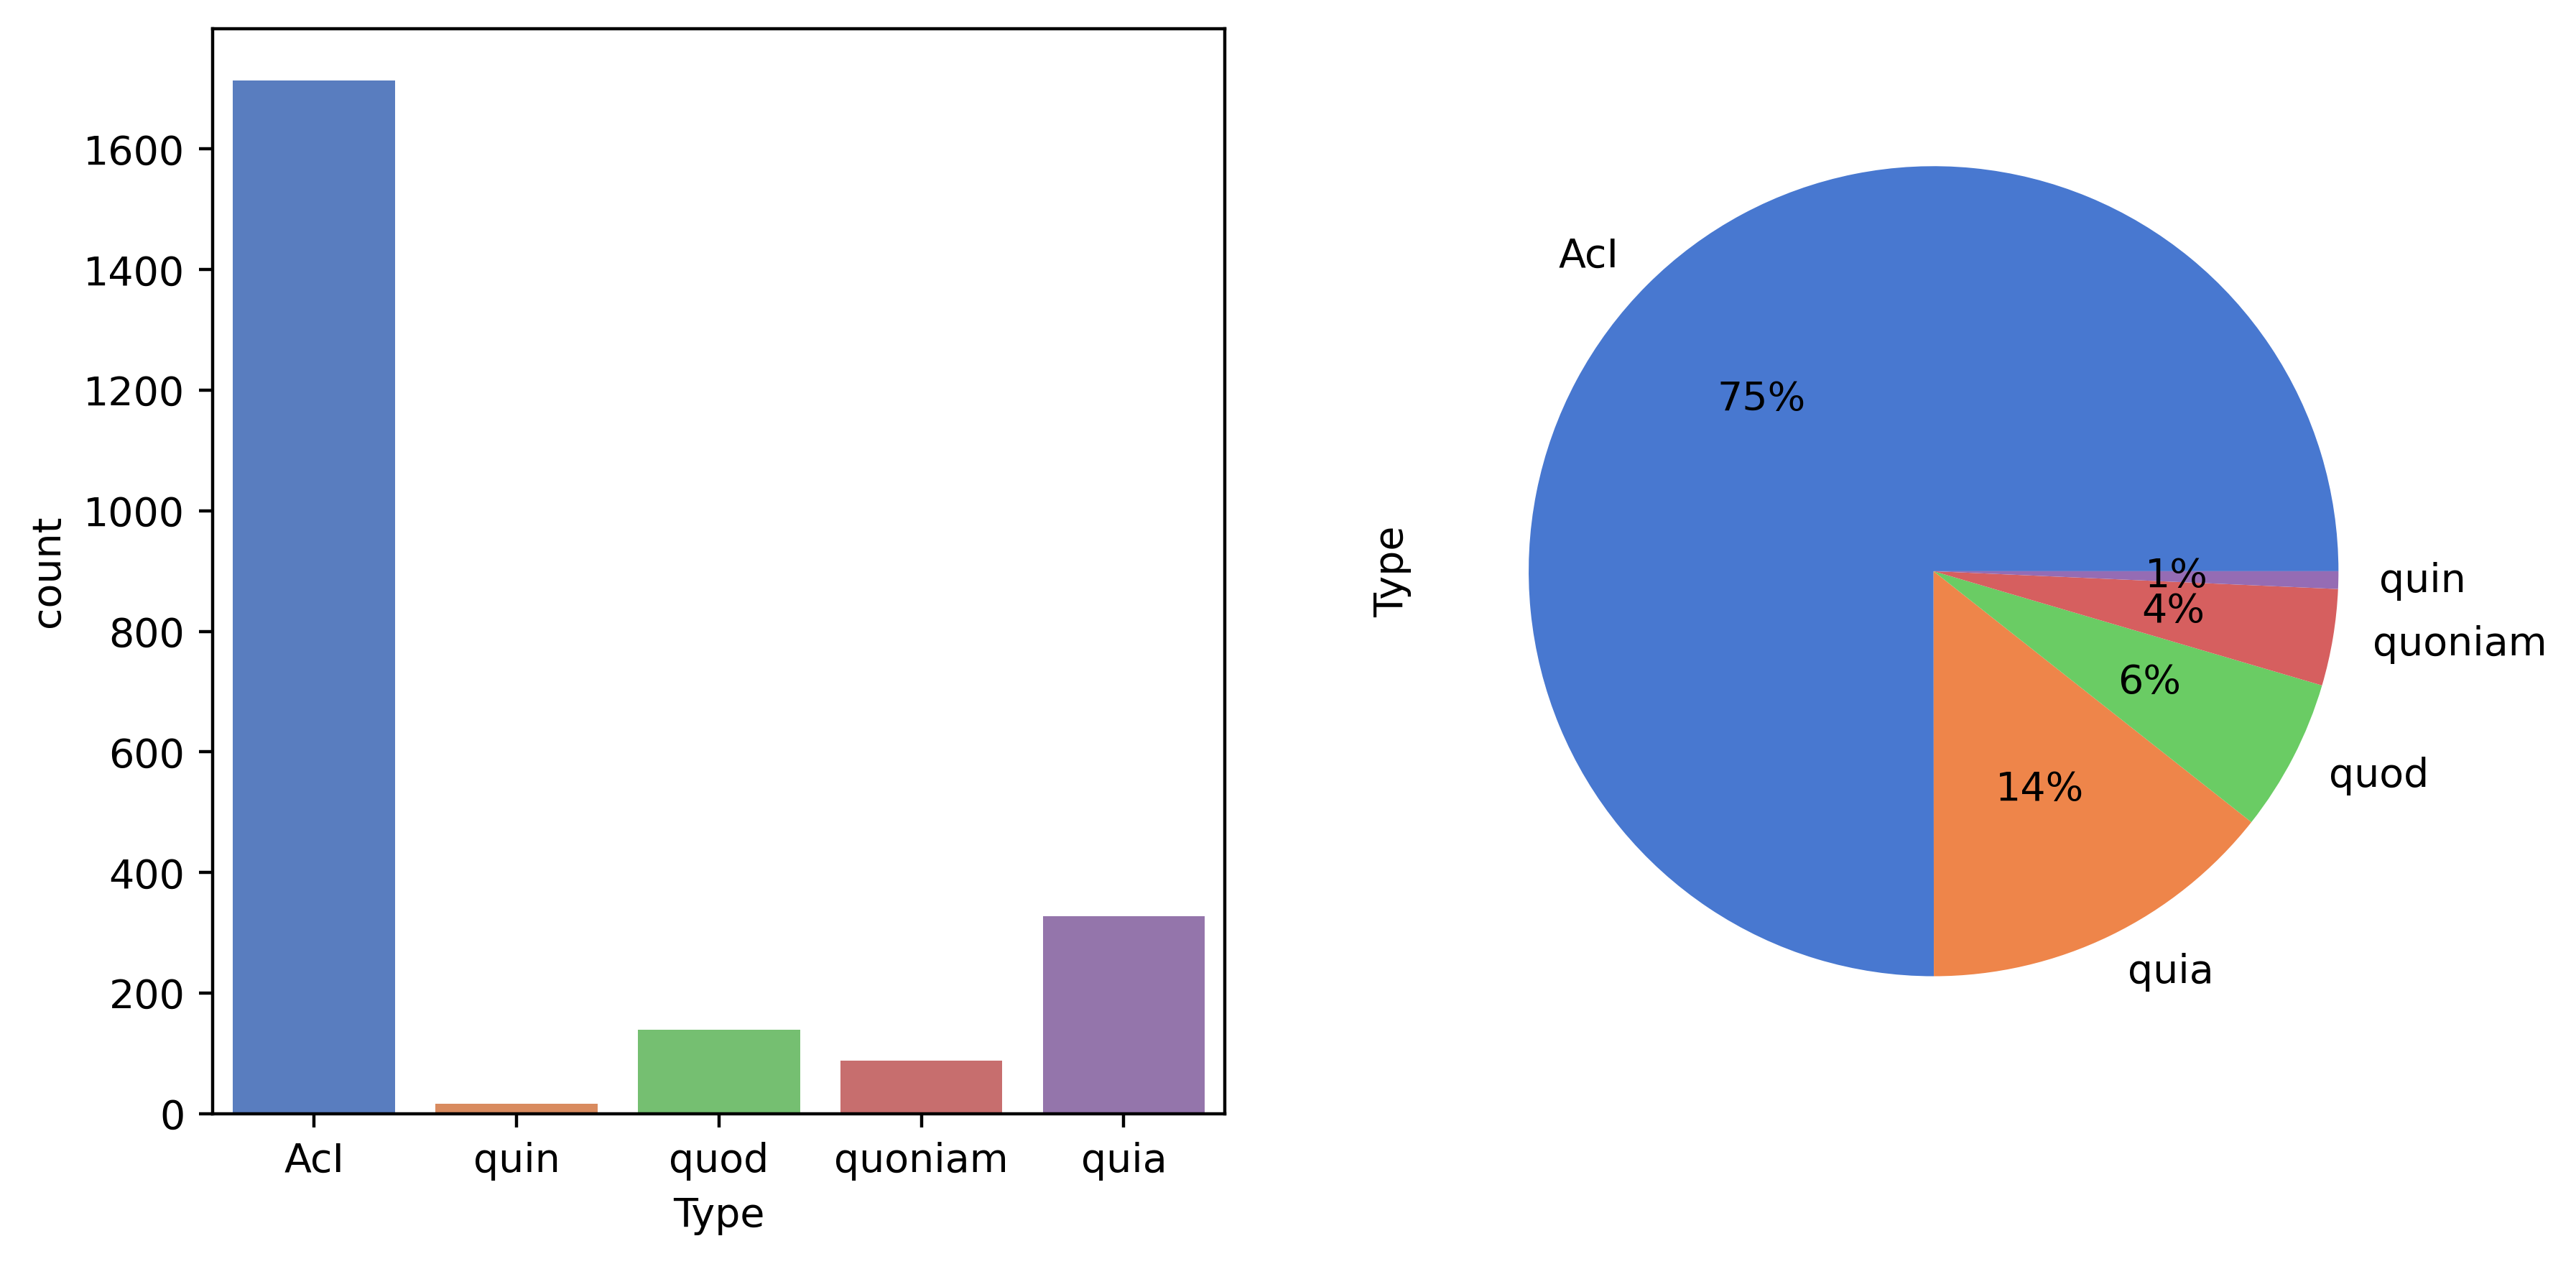

In [3]:
colors = sns.color_palette('muted')
fig, axes = plt.subplots(1, 2, figsize=(10,5), dpi=400, sharex=False, sharey=False)
sns.countplot(x='Type', data=df, ax=axes[0], palette='muted')
df['Type'].value_counts().plot.pie(ax=axes[1], autopct='%.0f%%', colors=colors)
# Colors don't match up - needs fixed

The data shows that *quia* is the most common conjunction for introducing indirect speech, and *quīn* the least.

Next, we'll see how frequency correlates with era.

<AxesSubplot:xlabel='Era', ylabel='count'>

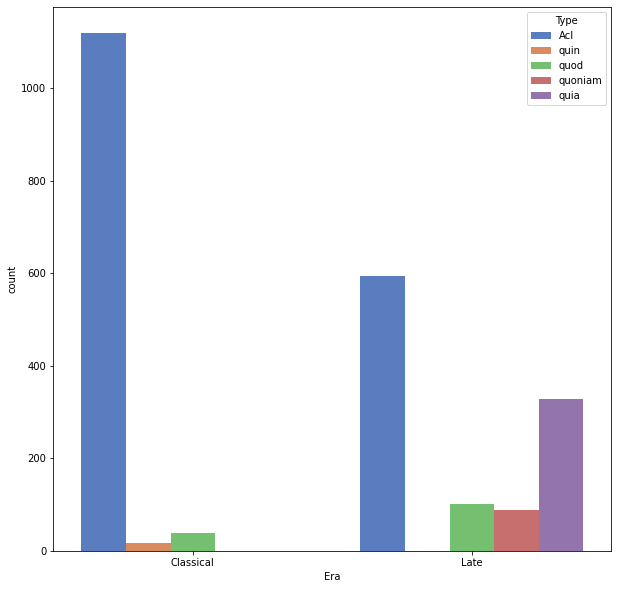

In [4]:
plt.figure(figsize=(10,10))
sns.countplot(x='Era', hue='Type', data=df, palette='muted')

We can see that for both eras, the accusative + infinitive structure is most common.
However, the Late texts show an increase in the amount and types of other structures, with *quia* and *quoniam* not being used as subordinators in Classical.

<AxesSubplot:xlabel='Author', ylabel='count'>

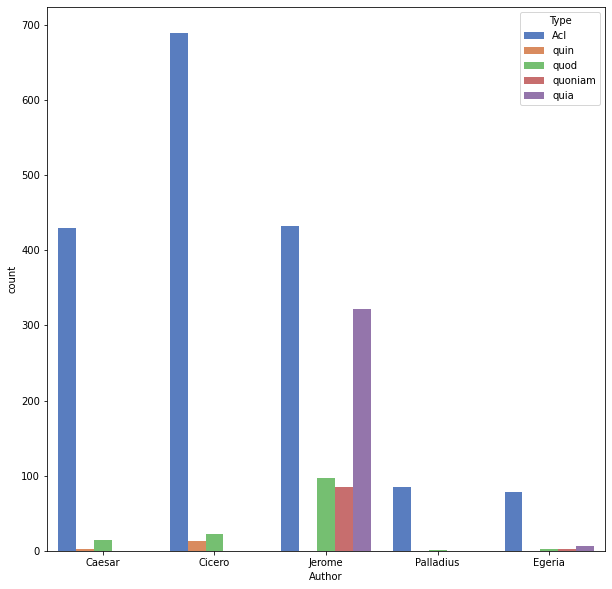

In [5]:
plt.figure(figsize=(10,10))
sns.countplot(x='Author', hue='Type', data=df, palette='muted')

Jerome uses conjunctions the most, as well as the greatest variation in type.
In fact, Jerome has significantly more.
This, however, could be due to a few factors.
First, Jerome's text is the entirety of the New Testament - a very long document.
Another possibility is that since it is a translation from Greek - Jerome was known to try to preserve the original syntax as much as possible - it may not reflect a wholly Latin development.
Looking at some of the original Greek, it seems that the use of subordinator *ὅτι* is translated with a Latin subordinator, not necessarily the same each time; in Matthew 2:16 it is translated with *quoniam* and in 2:22 with *quod*.
It also seems that, like Latin, Greek has more than one conjunction; the *quoniam* in Matthew 3:9 reflects Greek *γᾰ́ρ*.

Since Jerome's use may be motivated by translation concerns, it may be necessary to do more research into if it is purely due to his translation style or reflects a genuine change in Latin.

## Further Analysis (Progress Report 3)

Let's take a look at what kinds of TAM are associated with each construction.

We'll first look at voice. Unfortunately, due to the way the data is constructed, in a multi-clause sentence, only the first main verb is considered, so a few verbs may be missing.

<AxesSubplot:xlabel='Type', ylabel='count'>

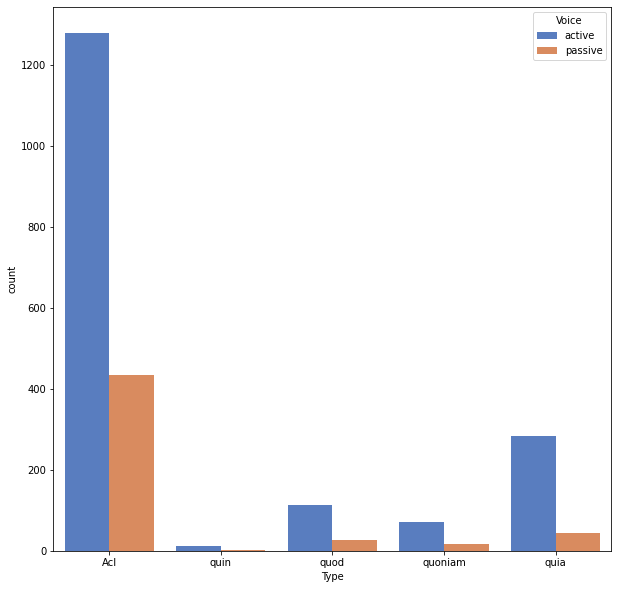

In [6]:
plt.figure(figsize=(10,10))
sns.countplot(x='Type', hue='Voice', data=df, palette='muted')

We can see that the active is always more common than the passive.

Next, we'll look at tense. Note that in Latin, infinitives can carry (relative) tense, either present, perfect, or future.

<AxesSubplot:xlabel='Type', ylabel='count'>

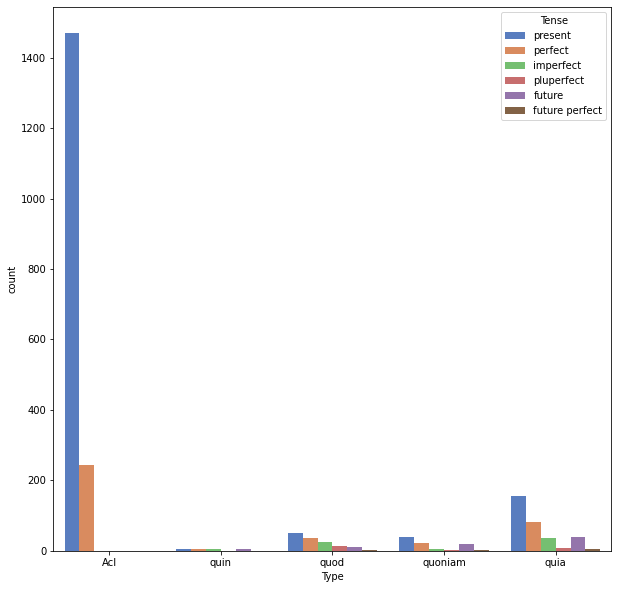

In [7]:
plt.figure(figsize=(10,10))
sns.countplot(x='Type', hue='Tense', data=df, palette='muted')

As one might expect, the present is the most common, followed by the perfect. Some more interesting facts are that `quīn` shows a roughly equal distribution of tenses, and that the future is more common than the imperfect for both `quoniam` and `quia`.

Next, we'll look at mood, but this time, we'll see how it correlates with author as well. In addition, we shall exclude the accusative + infinitive construction, since the mood is always 'infinitive'.

<AxesSubplot:xlabel='Author', ylabel='count'>

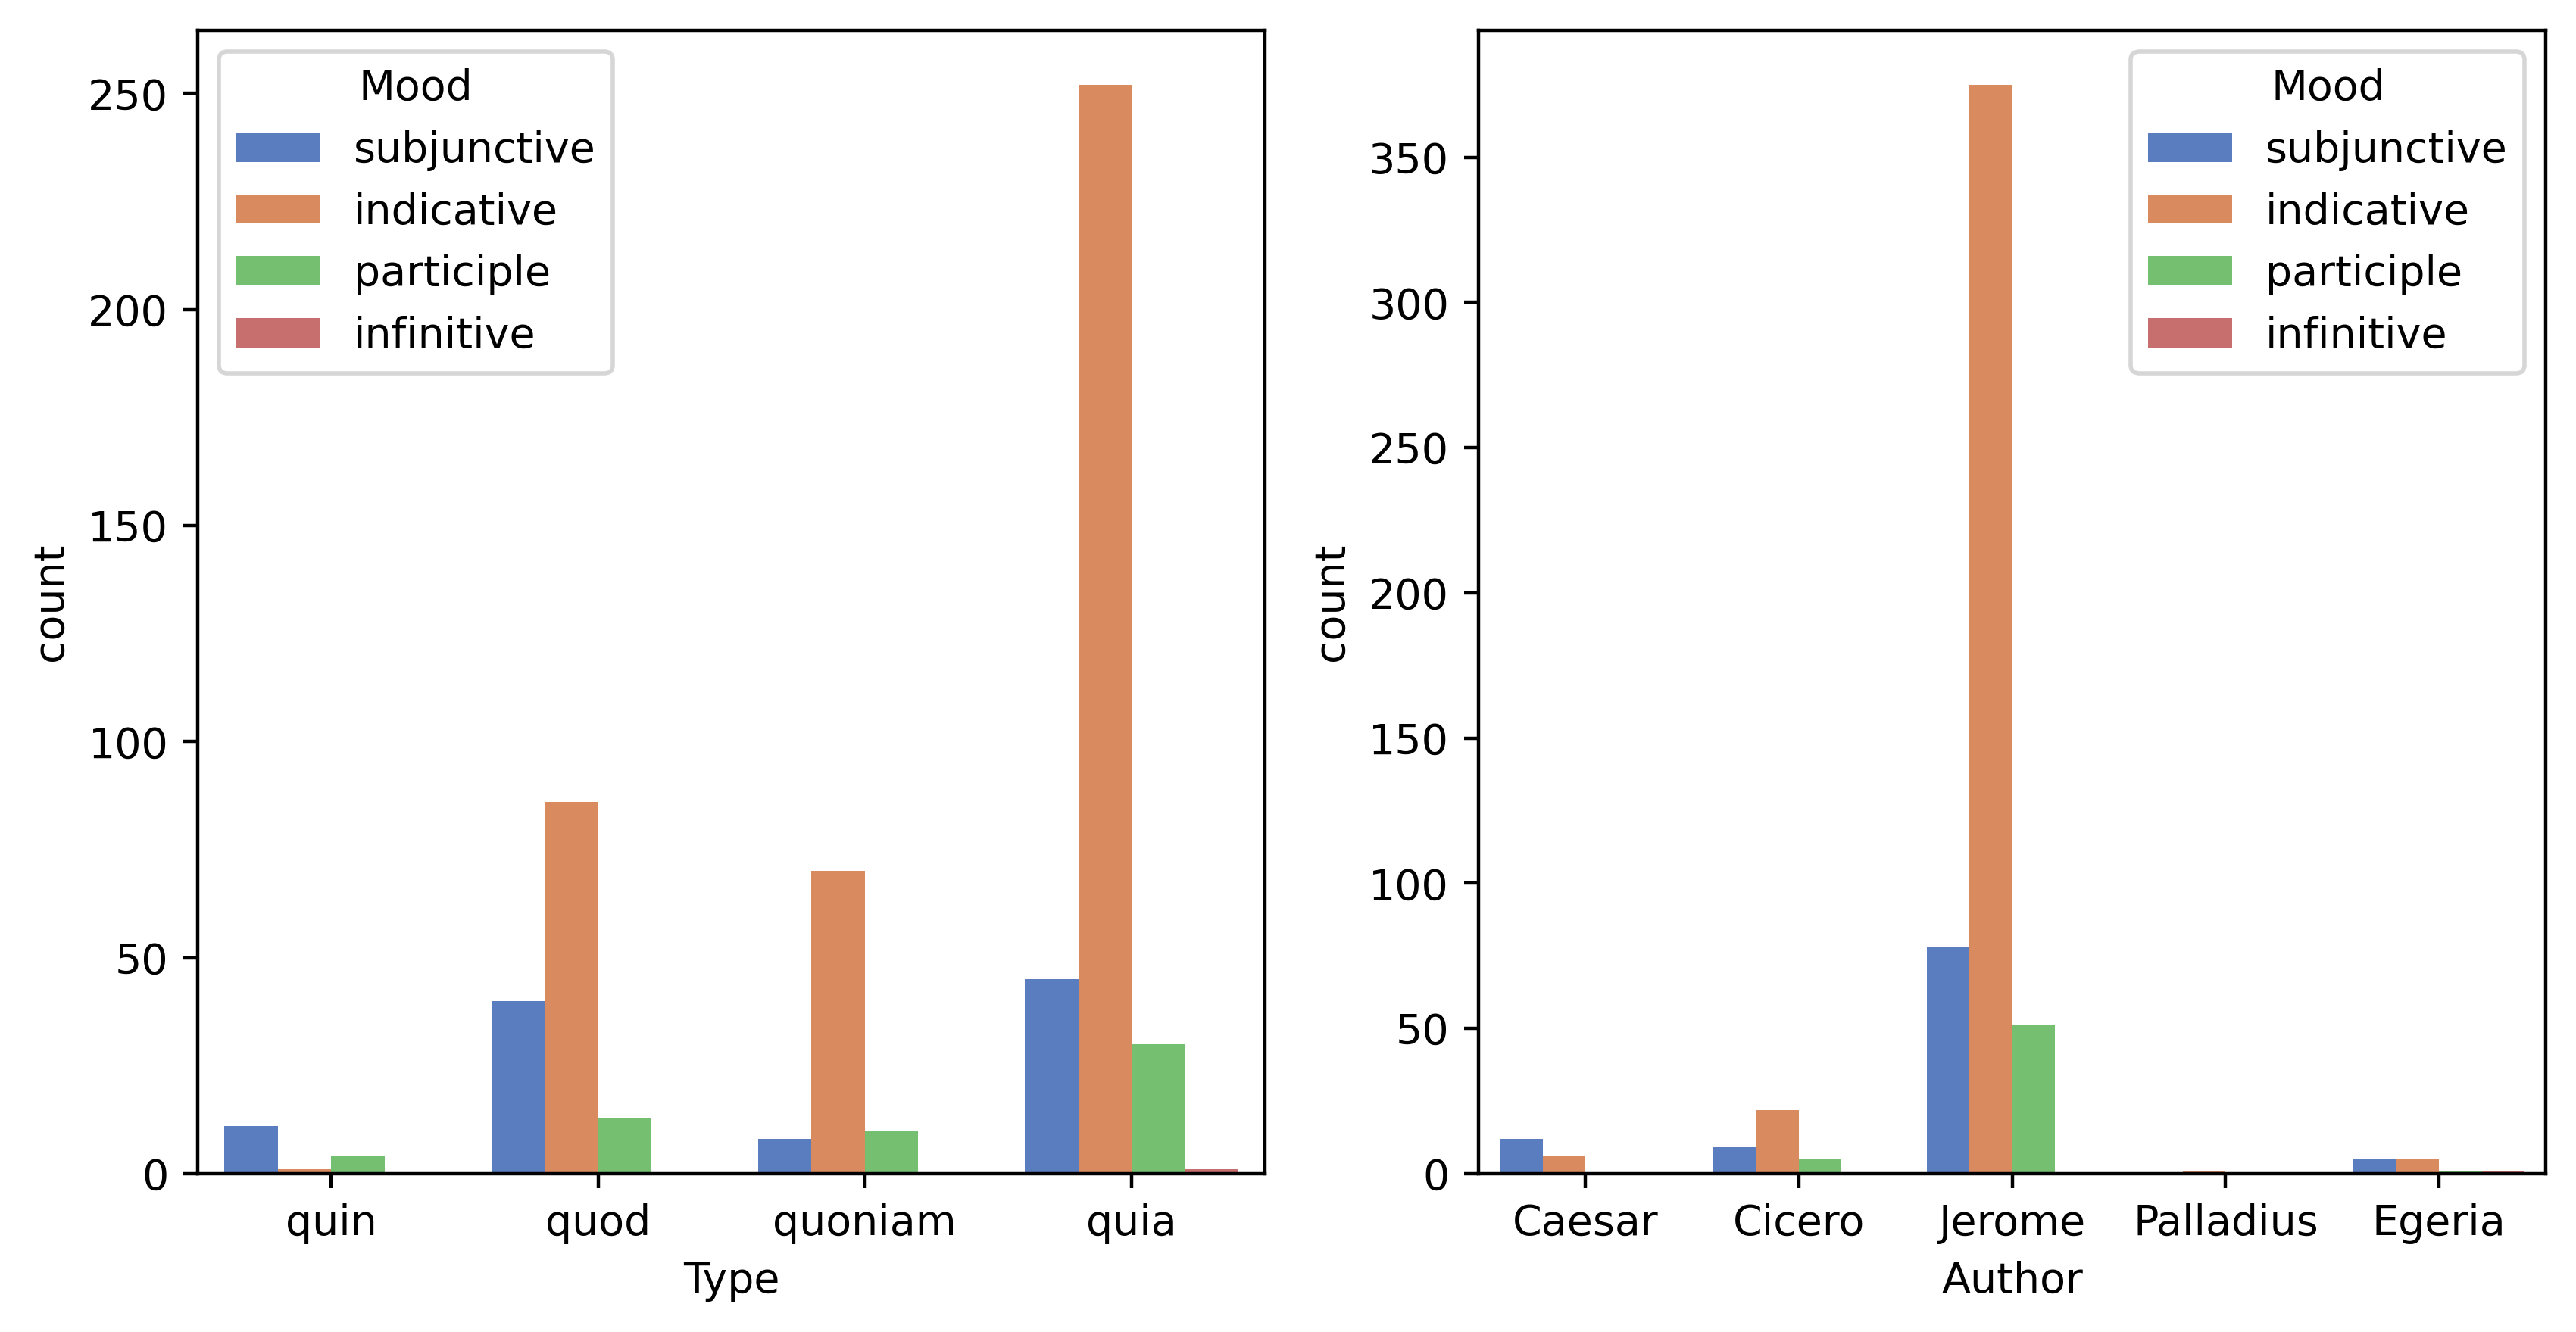

In [8]:
colors = sns.color_palette('muted')
fig, axes = plt.subplots(1, 2, figsize=(10,5), dpi=400, sharex=False, sharey=False)
sns.countplot(x='Type', hue='Mood', data=df[df.Type != 'AcI'], ax=axes[0], palette='muted')
sns.countplot(x='Author', hue='Mood', data=df[df.Type != 'AcI'], ax=axes[1], palette='muted')

We can see that the for all except *quīn*, the indicative is most common. Note that for the participle sentences, there would also be an auxiliary verb, which could be subjunctive or indicative; this situation is not accounted for here.
It is interesting that certain sentences following *quoniam* take the subjunctive, since it usually governs the indicative. Additionally, this seems to disprove one of our base assumptions, namely that these kinds of subordinating conjuctions govern the subjunctive when introducing indirect speech.

One question not necessarily related indirect speech that we can nonetheless investigate is the use of passive and future forms. These are known to have disappeared in all Romance languages (the modern Romance future comes out of a fusion between the infinitive and the present active form of *habeō* 'I have'). Do later texts show a reduction of these forms? We'll discount participles from our investigation of voice, as passive participles still survive in modern Romance.

<AxesSubplot:xlabel='Era', ylabel='count'>

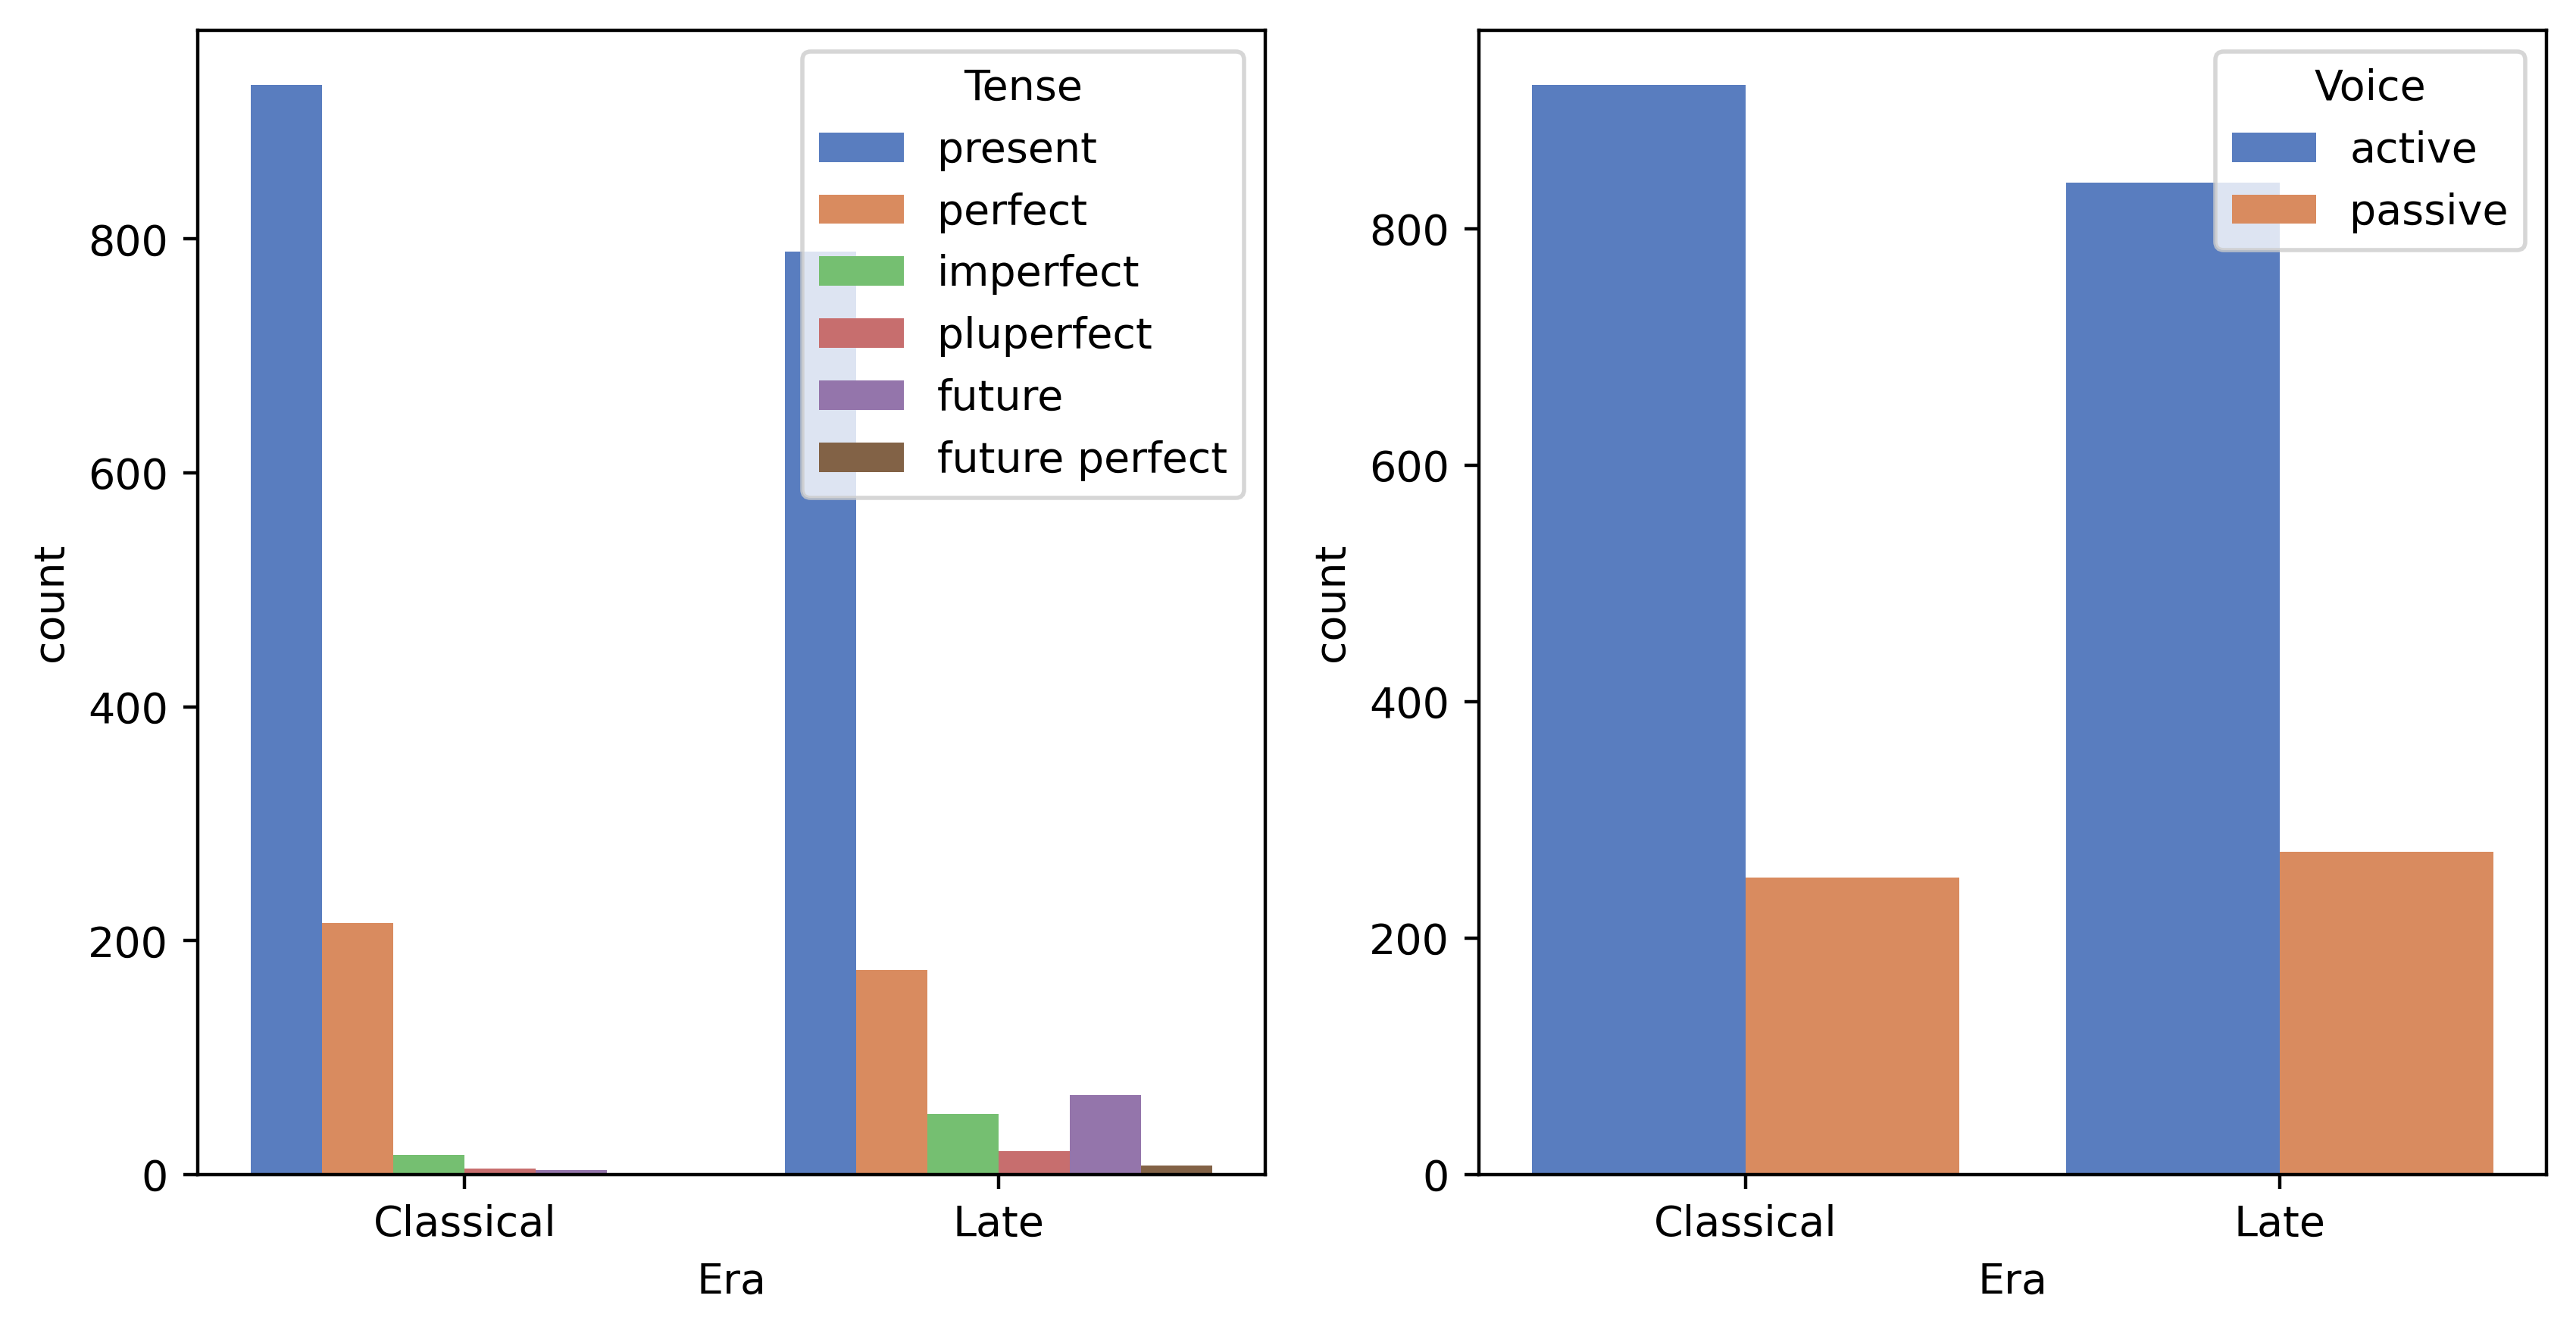

In [9]:
colors = sns.color_palette('muted')
fig, axes = plt.subplots(1, 2, figsize=(10,5), dpi=400, sharex=False, sharey=False)
sns.countplot(x='Era', hue='Tense', data=df, ax=axes[0], palette='muted')
sns.countplot(x='Era', hue='Voice', data=df[df.Mood != 'Participle'], ax=axes[1], palette='muted')

Interestingly, the Late era has even more future verbs! This is likely because indirect speech in the Classical era is overwhelmingly accusative + infinitive, where the future infinitive is not commonly used. The ratio between active and passive is roughly the same. This may indicate that the loss occurred later than the time of these texts, or that they persisted for longer in writing than they did in speech.